<a href="https://colab.research.google.com/github/Shubham-Govardhane/Shubham-Govardhane/blob/main/IMDB_movies_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
! pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df=df.head(5000)

In [ ]:
df.shape

(5000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
# duplicate values
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(4997, 2)

In [ ]:
df['sentiment'].value_counts()

0    2531
1    2466
Name: sentiment, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

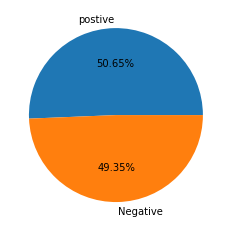

In [ ]:
plt.pie(df['sentiment'].value_counts(),labels=['postive','Negative'],autopct='%0.2f%%')
plt.show()

**Data Preprocessing** <br>
Lower case <br>
html tag cleaning <br>Tokenization <br>
Removing special characters <br>
Removing stop words and punctuation <br>
Stemming

In [ ]:
ps = PorterStemmer()

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
df['transformed_review'] = df['review'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
positive_wc = wc.generate(df[df['sentiment'] == 1]['transformed_review'].str.cat(sep=" "))

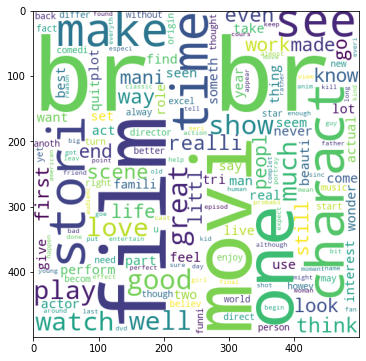

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [ ]:
negative_wc = wc.generate(df[df['sentiment'] == 0]['transformed_review'].str.cat(sep=" "))

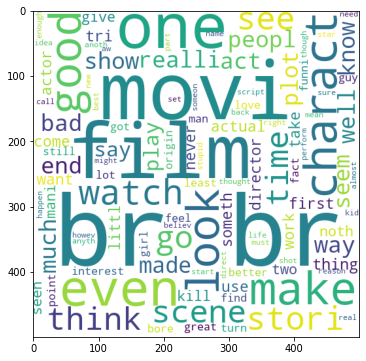

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [ ]:
df.head()

,review,sentiment,transformed_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
x = cv.fit_transform(df['transformed_review']).toarray()
x_tfidf = tfidf.fit_transform(df['transformed_review']).toarray()

In [ ]:
x.shape
x_tfidf.shape

(4997, 25864)

In [ ]:
y = df['sentiment'].values

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'RF': rfc, 
    'xgb':xgb
}

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)
x_tfidf_train,x_tfidf_test,y_train,y_test= train_test_split(x_tfidf,y,test_size=0.20,random_state=42)

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.609
Precision -  0.6126760563380281
For  NB
Accuracy -  0.83
Precision -  0.8514412416851441
For  RF
Accuracy -  0.815
Precision -  0.831140350877193
For  xgb
Accuracy -  0.786
Precision -  0.7570621468926554


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.830,0.851441
2,RF,0.815,0.831140
3,xgb,0.786,0.757062
0,KN,0.609,0.612676


**TF-IDF**

In [ ]:
def train_tfidf_classifier(clf,x_tfidf_train,y_train,x_tfidf_test,y_test):
    clf.fit(x_tfidf_train,y_train)
    y_tfidf_pred = clf.predict(x_tfidf_test)
    accuracy = accuracy_score(y_test,y_tfidf_pred)
    precision = precision_score(y_test,y_tfidf_pred)
    
    return accuracy,precision

In [ ]:
accuracy_tfidf_scores = []
precision_tfidf_scores = []

for name,clf in clfs.items():
    
    current_tfidf_accuracy,current_tfidf_precision = train_tfidf_classifier(clf, x_tfidf_train,y_train,x_tfidf_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_tfidf_accuracy)
    print("Precision - ",current_tfidf_precision)
    
    accuracy_tfidf_scores.append(current_tfidf_accuracy)
    precision_tfidf_scores.append(current_tfidf_precision)

For  KN
Accuracy -  0.711
Precision -  0.7097457627118644
For  NB
Accuracy -  0.826
Precision -  0.882640586797066
For  RF
Accuracy -  0.807
Precision -  0.8356164383561644
For  xgb
Accuracy -  0.775
Precision -  0.7490494296577946


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy-tfidf':accuracy_tfidf_scores,'Precision-tfidf':precision_tfidf_scores}).sort_values('Precision-tfidf',ascending=False)
temp_df

,Algorithm,Accuracy-tfidf,Precision-tfidf
1,NB,0.826,0.882641
2,RF,0.807,0.835616
3,xgb,0.775,0.749049
0,KN,0.711,0.709746


In [ ]:
new_df=performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy-tfidf,Precision-tfidf
0,NB,0.830,0.851441,0.826,0.882641
1,RF,0.815,0.831140,0.807,0.835616
2,xgb,0.786,0.757062,0.775,0.749049
3,KN,0.609,0.612676,0.711,0.709746
